# Usage of `src.data.compressor` module.

This notebook outlies the basic usage of the `src.data.compressors` module. Used to compress pandas dataframes.
 
**Requirements**

 - A `.yml` file being a copy of `config/config_template.yml` contaning information about the flights to be downloaded, as well as a path to the credentials config file

## Basic Setup

In [1]:
import sys
# This variable should indicate the path from this Jupyter Notebook to the root directory of the repo.
root_path = '../'
# Adds the repo's root to the list of paths
sys.path.append(root_path)

# Package to read yml files
import yaml
# Package to handle file paths
import os
# Package to deal with DataFrames
import pandas as pd

# Function to clear output from jupyter notebook
from IPython.display import clear_output
# Package for compressing dataframes into file
from src.data import compressors
# Utilities package
from src.common import utils

# Normalizing all paths to work on all operational systems
root_path = os.path.normpath(root_path) # Path from this notebook to the root directory
config_path_from_root = os.path.normpath('config/config_tutorial.yml') # Path from root to the desired config file
config_path = os.path.join(root_path, config_path_from_root) # Defining path from this notebook to config file

# Loading config file
with open(config_path, 'r',  encoding='utf8') as file:
    config = yaml.safe_load(file)

# Defining "clear-output" function to feed into logger
def clear():
    clear_output(wait=True)

# Creates an instance of a logger class to log all that happens, optional (but encouraged).
logger = utils.Logger(config, clear_function=clear)

data_directory = 'tutorial_data'

state_vectors = pd.read_csv(os.path.join(data_directory, 'state_vectors.csv'), index_col = 0)

csv_compressor = compressors.CsvCompressor(config, logger=logger)

# zip_compressor = compressors.ZipCompressor(config, logger=logger)

## Usage of CsvCompressor

The CSV Compressor works by choosing `config['data-compression']['csv-compressor']['num-points']` equally spaced points between the start and end of the flight, and linearly interpolating the values of the quantities of interest to those points. The resulting dataframe is then saved to file.

For decoding, the compressor reads and file and interpolated the data values for all integer seconds between the smallest and largest timestamps, reconstructing an interpolated version of the data.

In [2]:
# Compressing data
compressed_filename = 'state_vectors_compressed.csv'
csv_compressor.encode_from_dataframe_to_file(state_vectors, os.path.join(data_directory, compressed_filename))

# Decoding data
decompressed_data = csv_compressor.decode_to_dataframe_from_file(os.path.join(data_directory, compressed_filename))

decompressed_data

2023/11/08 13:00:17 : CSV Decoding data from tutorial_data/state_vectors_compressed.csv


,time,lat,lon,baroaltitude,geoaltitude,heading,velocity
0,1672504541,30.524768,-91.141534,129.540000,114.300000,132.646703,79.732182
1,1672504542,30.524326,-91.140966,143.955247,132.211482,132.569031,79.451578
2,1672504543,30.523884,-91.140398,158.370494,150.122965,132.491359,79.170974
3,1672504544,30.523442,-91.139830,172.785741,168.034447,132.413687,78.890370
4,1672504545,30.522991,-91.139252,187.259299,185.829308,132.373855,78.688947
...,...,...,...,...,...,...,...
3821,1672508362,32.931543,-97.054576,319.259110,276.463525,180.839266,70.019598
3822,1672508363,32.930925,-97.054582,315.719012,271.020988,180.751338,69.970721
3823,1672508364,32.930314,-97.054586,312.079341,267.040659,180.641321,69.969239
3824,1672508365,32.929703,-97.054591,308.439671,263.060329,180.531303,69.967757


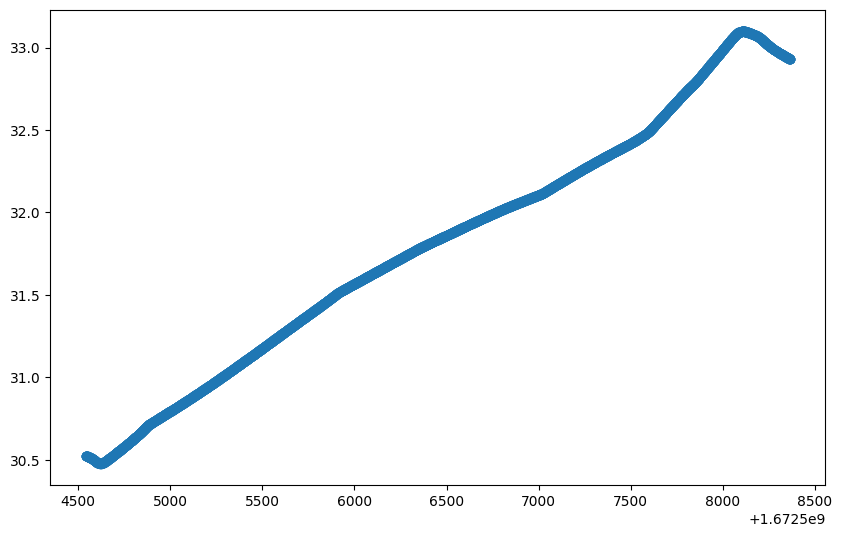

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = [10, 10/1.62])
ax.scatter(decompressed_data['time'], decompressed_data['lat'])

In [4]:
decompressed_data = decompressed_data.drop_duplicates(subset=['lat', 'lon'], keep='first')
